<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/CNN_(Convolutional_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#합성곱 신경망 (Convolutional Neural Networks, CNNs)
- Image recognition, speech recognition에서 자주 사용되나,  
  **Image Recognition** 분야에서 거의 모든 deep learning 기술에 사용됨

#CNN의 기원
- 얀 르쿤(Yann LeCun)이 LeNet-5 제시
- convolution layer, pooling layer 소개
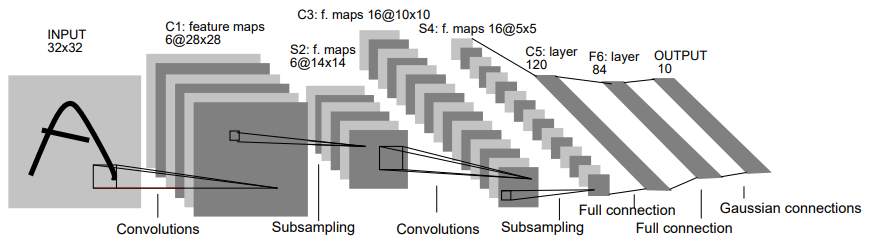

Reference: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4

#**Difference** between fully connected layer and convolution layer
- **Fully-connected layer**는 image와 같은 3차원 data의 형상을 무시
- 모든 Input data를 동등하게 취급 (공간정보 손실)

- **Convolution layer**는 image pixel 사이의 관계를 고려
- 2차원(흑백) or 3차원(컬러)의 형상을 유지 (공간정보 보존)
- 공간정보를 유지하기 때문에 fully-connected layer에 비해 적은 수의 parameter 필요

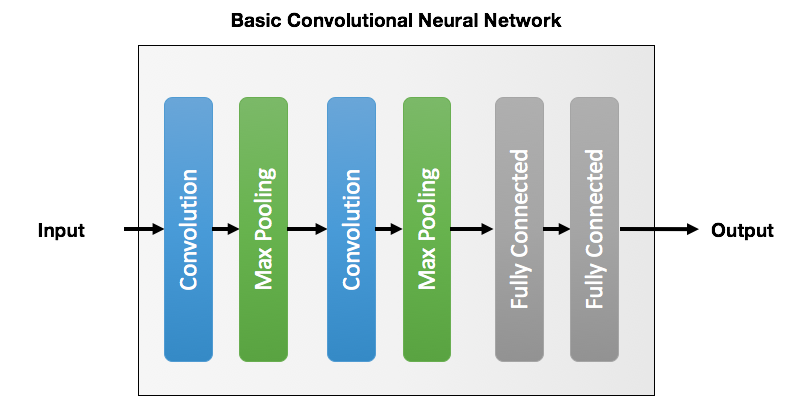

#합성곱 연산
- Filter 연산  
  - Filter에 대응하는 원소끼리의 곱에 대한 Sum
  - 연산이 완료된 결과 data를 **feature map**이라고 부름

- Filter (kernel)  
  - 사진 어플의 필터 (뽀샵)과 유사한 개념
  - Size는 거의 항상 **홀수**  
    * 짝수이면 padding이 비대칭
    * 왼쪽, 오른쪽을 다르게 주어야함
    * 중심위치 (중심 pixel)이 존재
  - Filter의 학습 parameter 수는 입력 데이터의 크기와 상관없이 일정  
  $→$ 과적합을 방지할 수 있음

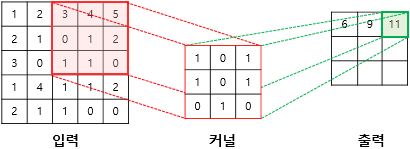

Reference: https://wikidocs.net/64066

- Feature map size  
  $(n - f + 1)$ x $(n - f + 1)$  
  $n$: 입력 데이터의 크기  
  $f$: filter(kernel)의 크기

#Padding & Stride
- Filter size와 함께, input data와 output data의 size를 결정
- 사용자가 직접 결정 가능


#Padding
- 합성곱 연산 후의 feature map size를 조절하기 위해 input data주위에 특정 값(주로 0)을 추가
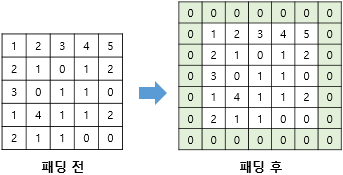

Reference: https://wikidocs.net/64066

Feature map size  
  $(n + 2p - f + 1)$ x $(n + 2p - f + 1)$  
  $n$: 입력 데이터의 크기  
  $f$: filter(kernel)의 크기  
  $p$: padding 값

  - valid  
    * padding을 주지 않음 (p = 0)
  - same  
    * Padding을 주어 input data size와 feature map size를 같게 만듦
    * Filter의 크기가 $k$일 때, $p = \frac{k - 1}{2}$  
      (단, stride = 1)

#Stride
- Filter를 적용하는 간격 (몇칸씩 이동하며 filter를 적용하는지)

Feature map size  
  $OH = \frac{H + 2P -FH}{S} + 1$  
  $OW = \frac{W + 2P -FW}{S} + 1$  
  - $H, W$: 입력 데이터의 height, width
  - $FH, FW$: filter의 height, width
  - $OH, OW$: 출력 데이터의 height, width
  - $P, S$: padding, stride
  - 단, $OH, OW$는 **정수**여야만 함

#Pooling
- Filter size내에서 특정 값을 추출하는 과정

  **Max Pooling**  
  - 가장 많이 사용되는 방법
  - 출력 data의 size계산은 convolution 연산과 동일  
  $OH = \frac{H + 2P -FH}{S} + 1$  
  $OW = \frac{W + 2P -FW}{S} + 1$  
  - 일반적으로 stride = 2, kernel_size = 2
  - **Feature map의 size를 절반으로 줄이는 역할**
  - Model이 물체의 주요한 특징을 학습하도록 한다.
  - Convolution neural network가 이동 불변성 특성을 가지게 함  
    (아래의 그림에서 9, 5의 위치가 바뀐다고 해도 최대값을 출력하므로 feature map에 들어가는 값은 9로 동일하다.)

  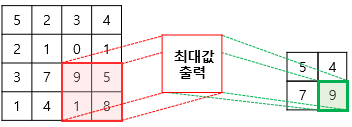

Reference: https://wikidocs.net/64066

- Model의 parameter 수를 줄여주고, 연산 속도를 빠르게 해줌

#Average Pooling
- Filter내에 있는 pixel값의 평균을 구하는 과정
- 최근에는 잘 사용하지 않음
- Max pooling과 동일하게 stride = 2, kernel_size = 2  
  $→$Feature map size를 절반으로 줄이는 역할

#2차원 이미지에 대한 필터 연산
- 가장자리 검출(Edge-Detection)  
  * Image의 가장자리를 detection
- Sobel Filter  
  * Horizontal: 가로 방향의 미분을 구하는 filter
  * Vertical: 세로 방향의 미분을 구하는 filter

  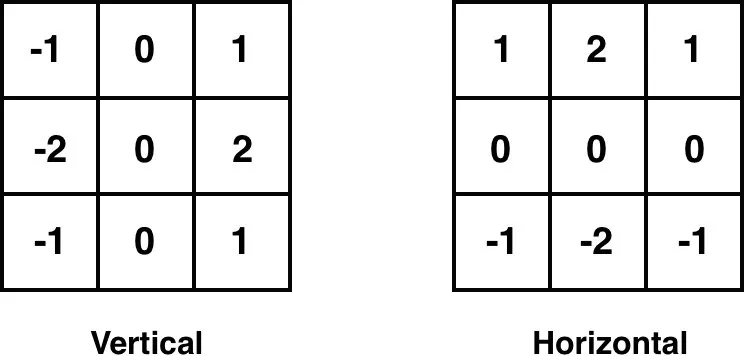

Reference: http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/

#Modules Import

In [2]:
import cv2  # open cv
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

In [3]:
# Util functions
# url을 통해 image data를 받아와서 image array로 변환
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)                        # url으로부터 image data 받기
  image = np.asarray(bytearray(resp.read()), dtype="uint8") # image data를 byte로 변환 후, image array로 변환

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE) # 흑백 image를 받을 때
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)     # color image를 받을 때
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

# Filter를 거친 output image
def filtered_image(image, filter, output_size):
  filtered_img = np.zeros((output_size, output_size))
  filter_size = filter.shape[0]

  for i in range(output_size):
    for j in range(output_size):
      # convolution 연산
      multiply_values = image[i:(i + filter_size), j:(j + filter_size)] * filter 
      sum_value = np.sum(multiply_values)

      if(sum_value > 255):  # 최대값
        sum_value = 255

      filtered_img[i, j] = sum_value
  
  return filtered_img

#Image 확인

image shape:  (440, 440)


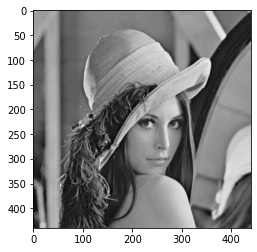

In [10]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image = url_to_image(img_url, gray=True)
print("image shape: ", image.shape)

plt.imshow(image, cmap='gray')
plt.show()

#Filter 연산 적용

In [4]:
# Create filters
vertical_filter = np.array([[1., 2., 1.,], 
                            [0., 0., 0.,],
                            [-1., -2., -1.]])

horizontal_filter = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

# Output size 계산
output_size = int((image.shape[0] - 3) / 1 + 1)
print ("output size: ", output_size)

# Filter 연산 처리
vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

# Vertical filter 처리 이미지 출력
# 가로방향의 edge가 두드러짐, 세로방향의 edge는 희미해짐
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Vertical')
plt.imshow(vertical_filtered, cmap='gray')

# Horizontal filter 처리 이미지 출력
# 세로방향의 edge가 두드러짐, 가로방향의 edge는 희미해짐
plt.subplot(1, 2, 2)
plt.title('Horizontal')
plt.imshow(horizontal_filtered, cmap='gray')
plt.show()

NameError: ignored

#이미지 필터를 적용한 최종 결과

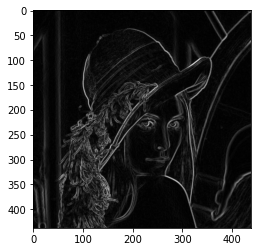

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))

# Edge가 두드러지게 표현됨
plt.imshow(sobel_image, cmap='gray')
plt.show()

#3차원 데이터의 Convolution 연산
- Color 이미지는 3차원으로 존재  
  (width, height, channel)  
  channel: RGB값

  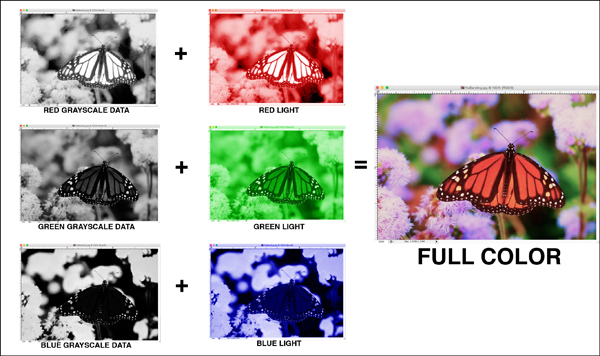

  Reference: https://www.projectorcentral.com/all-about-bit-depth.htm

image shape:  (440, 440, 3)


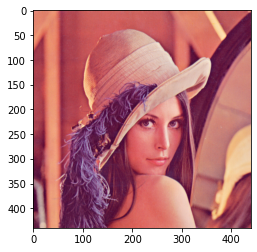

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image = url_to_image(img_url)
print("image shape: ", image.shape)

plt.imshow(image)
plt.show()

[[[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [232   0   0]
  [223   0   0]
  [201   0   0]]

 ...

 [[ 84   0   0]
  [ 86   0   0]
  [ 93   0   0]
  ...
  [174   0   0]
  [169   0   0]
  [172   0   0]]

 [[ 82   0   0]
  [ 86   0   0]
  [ 95   0   0]
  ...
  [177   0   0]
  [178   0   0]
  [183   0   0]]

 [[ 81   0   0]
  [ 86   0   0]
  [ 96   0   0]
  ...
  [178   0   0]
  [181   0   0]
  [185   0   0]]]


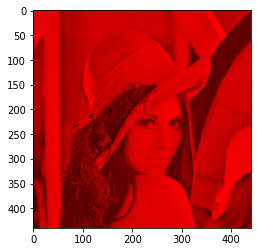

In [ ]:
image_copy = image.copy()
image_copy[:, :, 1] = 0   # Green color를 0으로
image_copy[:, :, 2] = 0   # Blue color를 0으로
image_red = image_copy    # Red만 남음

print(image_red)
plt.imshow(image_red)

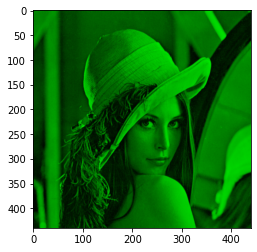

In [ ]:
image_copy = image.copy()
image_copy[:, :, 0] = 0   # Red color를 0으로
image_copy[:, :, 2] = 0   # Blue color를 0으로
image_green = image_copy    # Green만 남음

plt.imshow(image_green)

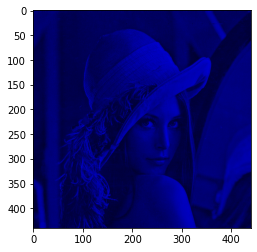

In [ ]:
image_copy = image.copy()
image_copy[:, :, 0] = 0   # Red color를 0으로
image_copy[:, :, 1] = 0   # Green color를 0으로
image_blue = image_copy    # Blue만 남음

plt.imshow(image_blue)

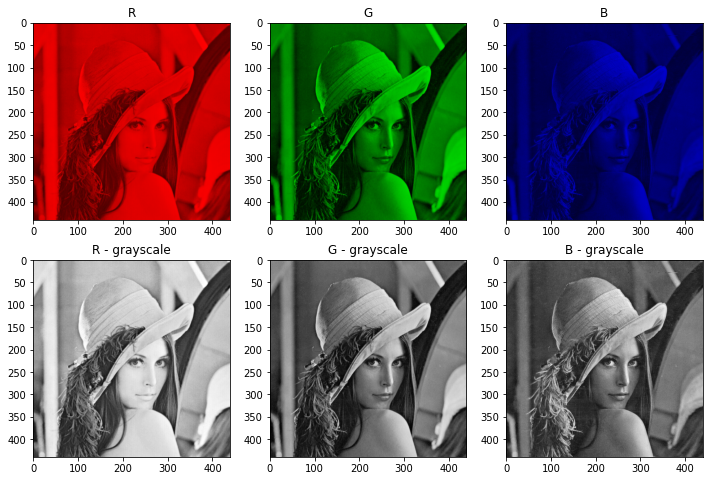

In [ ]:
fig = plt.figure(figsize=(12,8))

title_list = ['R', 'G', 'B',
              'R - grayscale', 'G - grayscale', 'B - grayscale']
image_list = [image_red, image_green, image_blue,
              image_red[:, :, 0], image_green[:, :, 1], image_blue[:, :, 2]]

# 각 image data 출력
for i, image in enumerate(image_list): 
  ax = fig.add_subplot(2, 3, i+1)
  ax.title.set_text("{}".format(title_list[i]))

  if i >= 3:                        # grayscale of RGB
    plt.imshow(image, cmap='gray')
  else:                             # RGB
    plt.imshow(image)

plt.show()

#연산 과정
- 각 channel마다 convolution 연산 적용
- 3 channel을 모두 합쳐서 '하나의 필터'

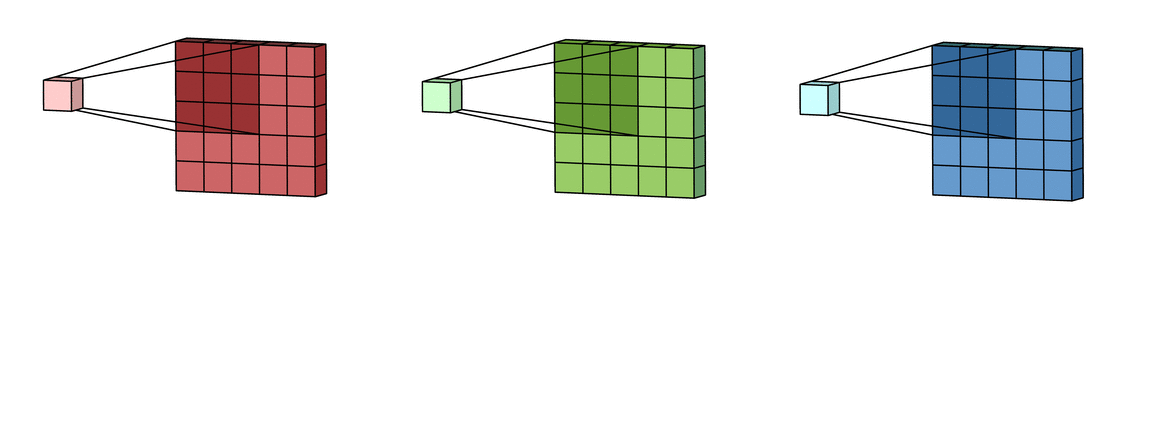

- 각각의 결과를 더함

> 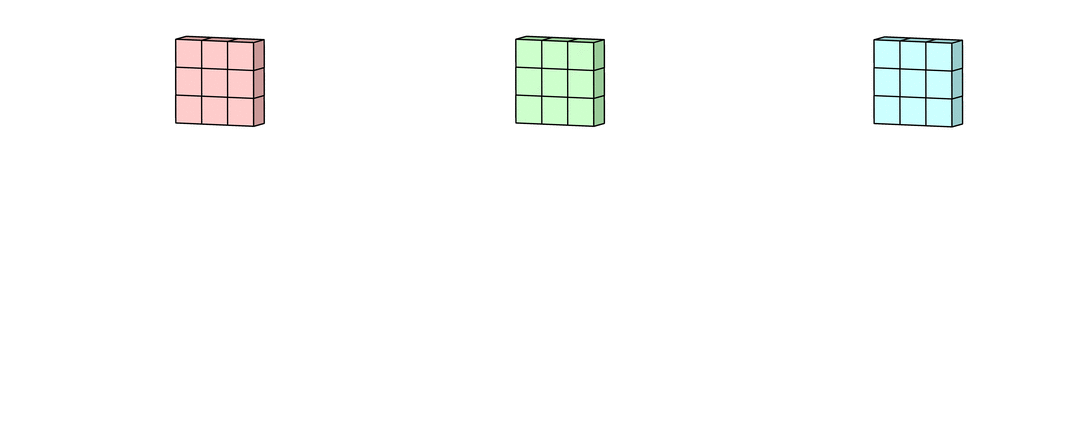

- 합쳐진 결과에 bias를 더함

> 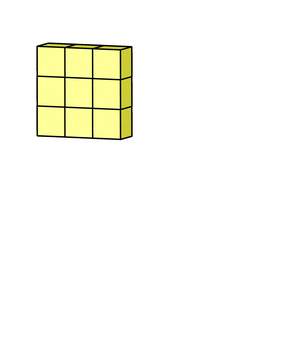

> Reference: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

#Modules import

In [5]:
import cv2  # open cv
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

In [6]:
from numpy.lib.index_tricks import OGridClass
# Util functions
# url을 통해 image data를 받아와서 image array로 변환
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)                        # url으로부터 image data 받기
  image = np.asarray(bytearray(resp.read()), dtype="uint8") # image data를 byte로 변환 후, image array로 변환

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE) # 흑백 image를 받을 때
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)     # color image를 받을 때
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

# convolution operation
def conv_op(image, kernel, pad=0, stride=1):
  H, W, C = image.shape # height, width, channel
  kernel_size = kernel.shape[0]

  OH = ((H + 2*pad - kernel_size) // stride) + 1  # output height calculation
  OW = ((W + 2*pad - kernel_size) // stride) + 1  # output width calculation

  filtered_img = np.zeros((OH, OW))
  img = np.pad(image, [(pad, pad), (pad, pad), (0, 0)], 'constant') # 상하좌우 0으로 padding

  for i in range(OH):
    for j in range(OW):
      for c in range(C):
        # convolution calculation
        multiply_values = image[i:(i + kernel_size), j:(j + kernel_size), c] * kernel
        sum_value = np.sum(multiply_values)

        filtered_img[i, j] += sum_value

  # Output data size에 맞게 크기 조정
  filtered_img = filtered_img.reshape(1, OH, OW, -1).transpose(0, 3, 1, 2)

  return filtered_img.astype(np.uint8)

#이미지 확인

image shape:  (440, 440, 3)


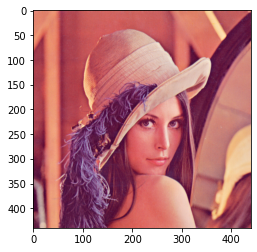

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image = url_to_image(img_url)
print("image shape: ", image.shape)

plt.imshow(image)
plt.show()

#Filter 연산 적용
- 3 x 3 크기의 3 channels filter 5개
- (5, 3, 3, 3) -> (5개, 3 channels, height, width)

In [ ]:
# Create random 5 filters
filter1 = np.random.randn(3, 3, 3)
filter2 = np.random.randn(3, 3, 3)
filter3 = np.random.randn(3, 3, 3)
filter4 = np.random.randn(3, 3, 3)
filter5 = np.random.randn(3, 3, 3)
filters = np.array([filter1, filter2, filter3, filter4, filter5])

# Show that filter's data
for i in range (0, 5):
  print("Filter",i+1, "shape: ", filters[i].shape)
  print("Filter ", i+1,"\n", filters[i])
  print("\n ------------------------------- \n")


Filter 1 shape:  (3, 3, 3)
Filter  1 
 [[[-1.29204973  0.07261629 -1.52043971]
  [ 0.74079519 -0.82735128 -0.54124432]
  [-1.46353229 -0.8718984  -0.29169467]]

 [[ 1.08801928  0.23467849  0.31947892]
  [-0.48889053 -0.49217557 -0.03576102]
  [-0.43490442  1.52403632  0.91980168]]

 [[-1.35334187  0.66595788 -0.26834703]
  [-1.15148614 -0.91195535 -1.03523116]
  [ 0.97387718 -0.5454176  -1.12538212]]]

 ------------------------------- 

Filter 2 shape:  (3, 3, 3)
Filter  2 
 [[[-0.0495031  -0.28109594  0.74929606]
  [-1.33140346 -0.97484104 -0.37244116]
  [-0.13348282 -0.25994026 -0.08370196]]

 [[-1.31546032  0.39441616 -0.40645153]
  [-0.05906164 -0.18946546 -1.28075264]
  [ 1.2470725   0.91003759 -0.89939528]]

 [[ 0.29707169  1.13942878  0.44913921]
  [-1.1461825  -0.08307219 -0.43643314]
  [-0.61249797 -0.71692598  1.44537628]]]

 ------------------------------- 

Filter 3 shape:  (3, 3, 3)
Filter  3 
 [[[ 0.77515182 -1.59340921  0.85663652]
  [-1.61083128  1.20575714  0.37240473]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


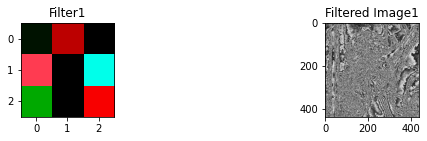

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


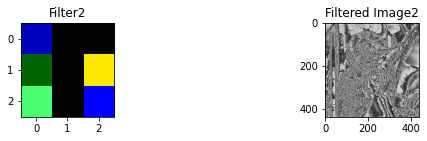

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


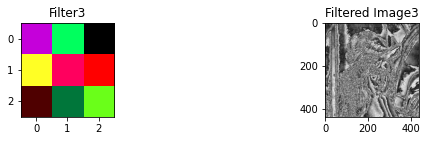

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


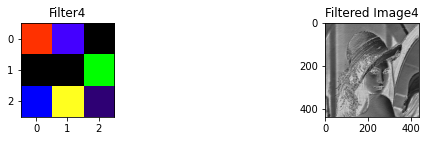

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


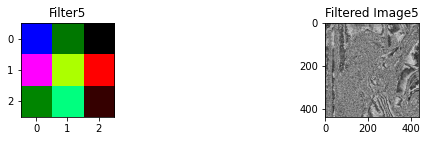

In [ ]:
filtered_imgs = np.array([conv_op(image, filters[0]), conv_op(image, filters[1]), conv_op(image, filters[2]), conv_op(image, filters[3]), conv_op(image, filters[4])])



for i in range(0, 5):
  plt.figure(figsize=(10, 10))
  # Filter 결과 출력
  plt.subplot(5, 2, 2*i + 1)
  plt.title("Filter" + str(i+1))
  plt.imshow(filters[i], cmap='gray')

  # Filtered image 결과 출력
  plt.subplot(5, 2, 2*i + 2)
  plt.title("Filtered Image" + str(i+1))
  plt.imshow(filtered_imgs[i][0, 0, :, :], cmap='gray')

  plt.show()
  print("\n")




#Filter operation 최종 결과

(1, 1, 438, 438)


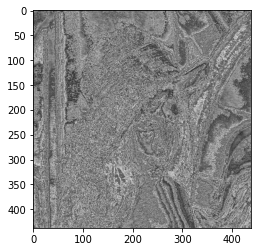

In [ ]:
# 각 filter를 거친 image 사진 합치기
filtered_img = np.stack([filtered_imgs[0], filtered_imgs[1], filtered_imgs[2], filtered_imgs[3], filtered_imgs[4]]).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0, 0, :, :], cmap='gray')
plt.show()

#전체 과정

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


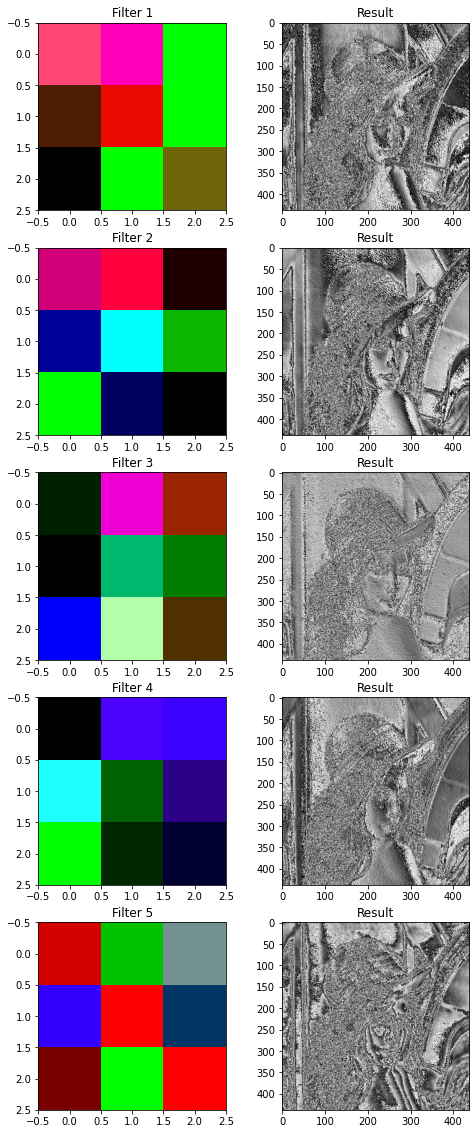

In [ ]:
np.random.seed(222)

fig = plt.figure(figsize=(8,20))

filter_num = 5
filtered_img = []

for i in range(filter_num):
  ax = fig.add_subplot(5, 2, 2*i+1)
  ax.title.set_text("Filter {}".format(i+1))

  filter = np.random.randn(3, 3, 3)
  plt.imshow(filter)

  ax = fig.add_subplot(5, 2, 2*i+2)
  ax.title.set_text("Result")

  filtered = conv_op(image, filter)   # convolution operation
  filtered_img.append(filtered)
  plt.imshow(filtered[0, 0, :, :], cmap='gray')

plt.show()

(1, 1, 438, 438)


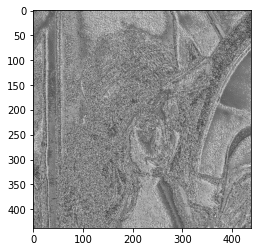

In [ ]:
# 각 filter를 거친 image 사진 합치기
filtered_img = np.stack(filtered_img).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0, 0, :, :], cmap='gray')
plt.show()

#Convolutional Neural Network

#Convolution Layer

In [7]:
# image to column
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

  N, C, H, W = input_data.shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1

  img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
  col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
  
  col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
  return col

# column to image
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
  
  N, C, H, W = input_shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

  img = np.zeros(N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1)

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

  return img[:, :, pad:H + pad, pad:W + pad]

In [108]:
class Conv2D:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

    self.input_data = None
    self.col = None
    self.col_W = None

    self.dW = None          # Weight
    self.db = None          # Bias

  def forward(self, input_data):
    filter_n, C, filter_h, filter_w = self.W.shape
    N, C, H, W = input_data.shape

    out_h = (H + 2*self.pad - filter_h) // self.stride + 1
    out_w = (W + 2*self.pad - filter_w) // self.stride + 1

    col = im2col(input_data, filter_h, filter_w, self.stride, self.pad)
    col_W = self.W.reshape(filter_n, -1).T

    out = np.dot(col, col_W) + self.b
    output = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    self.input_data = input_data
    self.col = col
    self.col_W = col_W

    return output

  def backword(self, dout):
    filter_n, C, filter_h, filter_w = self.W.shape
    dout = dout.transpose(0, 2, 3, 1).reshape(-1, filter_n)

    self.db = np.sum(dout, axis=0)
    self.dW = np.dot(self.col.T, dout)
    self.dW = self.dW.transpose(1, 0).reshape(filter_n, C, filter_h, filter_w)

    dcol = np.dot(dout, self.col_W.T)
    dx = col2im(dout, self.input_data.shape, filter_h, filter_w, self.stride, self.pad)

    return dx

#Convolution Layer Test

In [9]:
def init_weight(num_filters, data_dim, kernel_size, stride=1, pad=0, weight_std=0.01):

  weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
  biases = np.zeros(num_filters)

  return weights, biases

image shape:  (440, 440, 1)


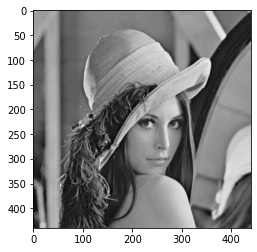

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image shape: ", image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W, b)
output = conv.forward(image_gray)

print("Conv Layer size:", output.shape)

Conv Layer size: (1, 1, 438, 438)


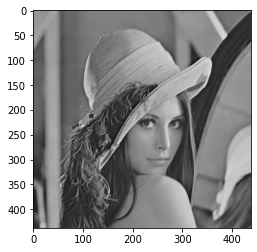

In [ ]:
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W2, b2 = init_weight(1, 1, 3, stride=2)
conv2 = Conv2D(W2, b2, stride=2)
output2 = conv2.forward(image_gray)

print("Conv Layer size:", output2.shape)

Conv Layer size: (1, 1, 219, 219)


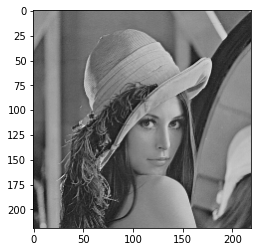

In [ ]:
plt.imshow(output2[0, 0, :, :], cmap='gray')
plt.show()

#For color Image

image shape:  (440, 440, 3)


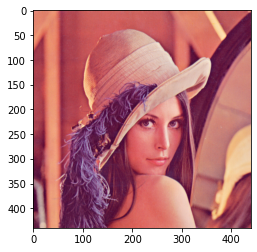

image shape:  (1, 3, 440, 440)


In [12]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_color = url_to_image(img_url)
print("image shape: ", image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = np.expand_dims(image_color.transpose(2, 0, 1), axis=0)
print("image shape: ", image_color.shape)

In [ ]:
W3, b3 = init_weight(10, 3, 3)
conv3 = Conv2D(W3, b3)
output3 = conv3.forward(image_color)

print("Conv Layer size:", output3.shape)

Conv Layer size: (1, 10, 438, 438)


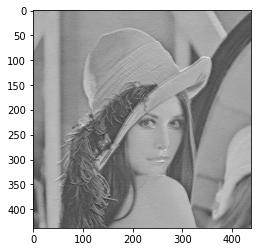

In [ ]:
plt.imshow(output3[0, 0, :, :], cmap='gray')
plt.show()

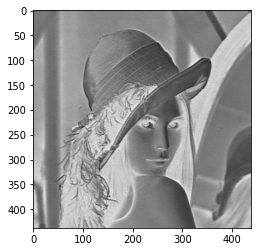

In [ ]:
plt.imshow(output3[0, 1, :, :], cmap='gray')
plt.show()

#동일한 이미지 여러장 Test (배치 처리)

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image shape: ", image_gray.shape)

image_gray = image_gray.transpose(2, 0, 1)
print("image_gray.shape", image_gray.shape)


image shape:  (440, 440, 1)
image_gray.shape (1, 440, 440)


In [ ]:
batch_image_gray = np.repeat(image_gray[np.newaxis, :, :, :], 15, axis=0)
print(batch_image_gray.shape)

(15, 1, 440, 440)


In [ ]:
W4, b4 = init_weight(10, 1, 3, stride=2)
conv4 = Conv2D(W4, b4, stride=2)
output4 = conv4.forward(batch_image_gray)

print("Conv Layer size:", output4.shape)

Conv Layer size: (15, 10, 219, 219)


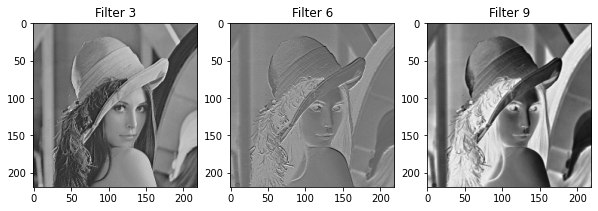

In [ ]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Filter 3")
plt.imshow(output4[3, 3, :, :], cmap='gray')

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Filter 6")
plt.imshow(output4[3, 6, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Filter 9")
plt.imshow(output4[3, 9, :, :], cmap='gray')

In [ ]:
W5, b5 = init_weight(32, 3, 3, stride=3)
conv5 = Conv2D(W5, b5, stride=3)
output5 = conv5.forward(image_color)

print("Conv Layer size:", output5.shape)

Conv Layer size: (1, 32, 146, 146)


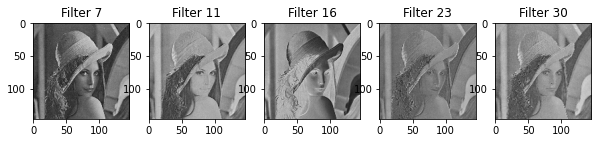

In [ ]:
plt.figure(figsize=(10, 10))

# Use 7th filter
plt.subplot(1, 5, 1)
plt.title("Filter 7")
plt.imshow(output5[0, 7, :, :], cmap='gray')

# Use 11th filter
plt.subplot(1, 5, 2)
plt.title("Filter 11")
plt.imshow(output5[0, 11, :, :], cmap='gray')

# Use 16th filter
plt.subplot(1, 5, 3)
plt.title("Filter 16")
plt.imshow(output5[0, 16, :, :], cmap='gray')

# Use 23th filter
plt.subplot(1, 5, 4)
plt.title("Filter 23")
plt.imshow(output5[0, 23, :, :], cmap='gray')

# Use 30th filter
plt.subplot(1, 5, 5)
plt.title("Filter 30")
plt.imshow(output5[0, 30, :, :], cmap='gray')

#배치 처리 (Color)

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_color = url_to_image(img_url)
print("image shape: ", image_color.shape)

image_color = image_color.transpose(2, 0, 1)
print("image shape: ", image_color.shape)

image shape:  (440, 440, 3)
image shape:  (3, 440, 440)


In [ ]:
batch_image_color = np.repeat(image_color[np.newaxis, :, :, :], 15, axis=0)
print(batch_image_color.shape)

(15, 3, 440, 440)


In [ ]:
W6, b6 = init_weight(64, 3, 5)
conv6 = Conv2D(W6, b6)
output6 = conv6.forward(batch_image_color)

print("Conv Layer size:", output6.shape)

Conv Layer size: (15, 64, 436, 436)


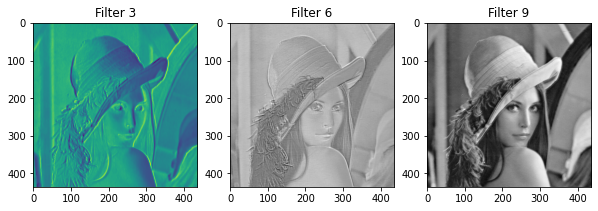

In [ ]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Filter 3")
plt.imshow(output6[3, 3, :, :])

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Filter 6")
plt.imshow(output6[3, 6, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Filter 9")
plt.imshow(output6[3, 9, :, :], cmap='gray')

#Pooling Layer

In [10]:
class Pooling2D:
  def __init__(self, kernel_size=2, stride=1, pad=0):
    self.kernel_size = kernel_size
    self.stride = stride
    self.pad = pad

    self.input_data = None
    self.arg_max = None

  def forward(self, input_data):
    N, C, H, W = input_data.shape
    out_h = (H - self.kernel_size) // self.stride + 1
    out_w = (W - self.kernel_size) // self.stride + 1

    col = im2col(input_data, self.kernel_size, self.kernel_size, self.stride, self.pad)
    col = col.reshape(-1, self.kernel_size * self.kernel_size)

    arg_max = np.argmax(col, axis=1)
    out = np.max(col, axis=1)
    output = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    self.input_data = input_data
    self.arg_max = arg_max

    return output

  def backward(self, dout):
    dout = dout.transpose(0, 2, 3, 1)

    pool_size = self.kernel_size * self.kernel_size
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape + (pool_size, ))

    dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
    dx = col2im(dcol, self.input_data.shape, self.kernel_size, self.kernel_size, self.stride, self.pad)

    return dx  

#Pooling Layer Test
- 2D image
  - (Height, width, 1)

image shape:  (440, 440, 1)


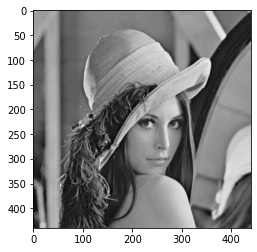

In [14]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image shape: ", image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

In [28]:
W, b = init_weight(8, 1, 3)
conv = Conv2D(W, b)
pool = Pooling2D(stride=2, kernel_size=2)
output1 = conv.forward(image_gray)
print("Conv size", output1.shape)

Conv size (1, 8, 438, 438)


In [29]:
output1 = pool.forward(output1)
print("Pooling Layer size", output1.shape)

Pooling Layer size (1, 8, 219, 219)


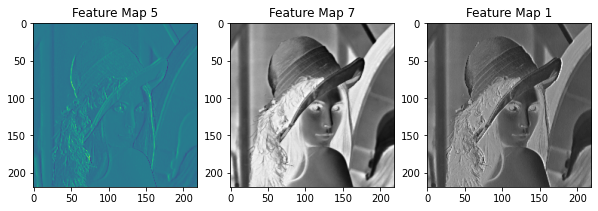

In [30]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 5")
plt.imshow(output1[0, 4, :, :])

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 7")
plt.imshow(output1[0, 6, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 1")
plt.imshow(output1[0, 0, :, :], cmap='gray')

In [16]:
W2, b2 = init_weight(32, 1, 3, stride=2)
conv2 = Conv2D(W2, b2)
pool = Pooling2D(stride=2, kernel_size=2)


In [17]:
output2 = conv2.forward(image_gray)
output2 = pool.forward(output2)
print(output2.shape)

(1, 32, 219, 219)


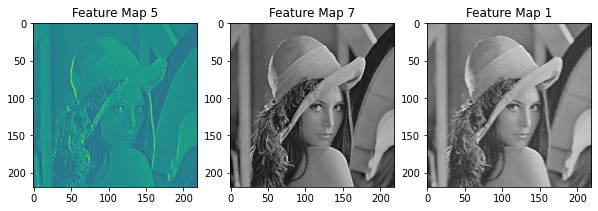

In [19]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 5")
plt.imshow(output2[0, 4, :, :])

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 7")
plt.imshow(output2[0, 6, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 1")
plt.imshow(output2[0, 0, :, :], cmap='gray')

#동일한 이미지 배치처리
  - Color Image
  - convolution -> maxpooling -> convolution -> maxpooling
  - 시각화 과정
  

image shape:  (440, 440, 3)


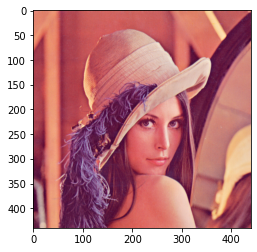

image_gray.color (3, 440, 440)


In [23]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image_color = url_to_image(img_url)
print("image shape: ", image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = image_color.transpose(2, 0, 1)
print("image_gray.color", image_color.shape)

In [24]:
batch_image_color = np.repeat(image_color[np.newaxis, :, :, :], 15, axis=0)
print(batch_image_color.shape)

(15, 3, 440, 440)


In [29]:
# First Layer

W, b = init_weight(10, 3, 3)
conv1 = Conv2D(W, b)
pool = Pooling2D(stride=2, kernel_size=2)

In [26]:
output1 = conv1.forward(batch_image_color)
print(output1.shape)

(15, 10, 438, 438)


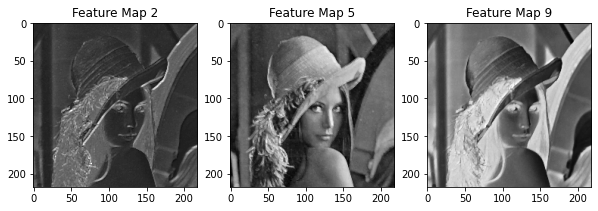

In [41]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 2")
plt.imshow(output1[4, 1, :, :], cmap='gray')

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 5")
plt.imshow(output1[4, 4, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 9")
plt.imshow(output1[4, 8, :, :], cmap='gray')

In [30]:
output1 = pool.forward(output1)
print(output1.shape)

(15, 10, 218, 218)


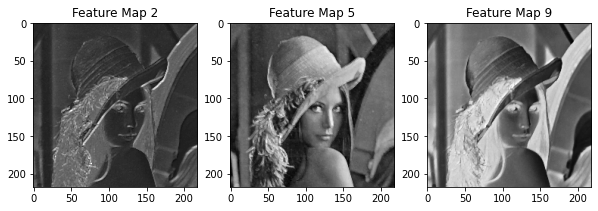

In [40]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 2")
plt.imshow(output1[4, 1, :, :], cmap='gray')

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 5")
plt.imshow(output1[4, 4, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 9")
plt.imshow(output1[4, 8, :, :], cmap='gray')

In [32]:
# Second Layer

W2, b2 = init_weight(30, 10, 3)
conv2 = Conv2D(W2, b2)
pool = Pooling2D(stride=2, kernel_size=2)

In [34]:
output2 = conv2.forward(output1)
print(output2.shape)

(15, 30, 216, 216)


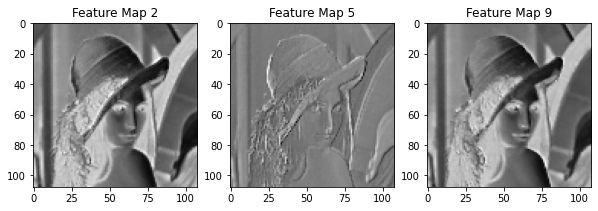

In [39]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 2")
plt.imshow(output2[4, 1, :, :], cmap='gray')

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 5")
plt.imshow(output2[4, 4, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 9")
plt.imshow(output2[4, 8, :, :], cmap='gray')

In [36]:
output2 = pool.forward(output2)
print(output2.shape)

(15, 30, 108, 108)


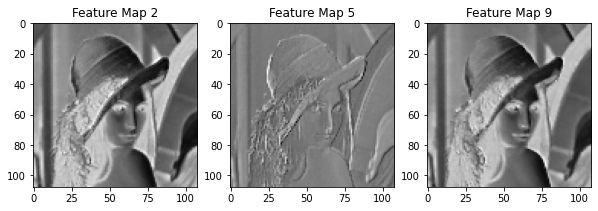

In [38]:
plt.figure(figsize=(10, 10))

# Use third filter
plt.subplot(1, 3, 1)
plt.title("Feature Map 2")
plt.imshow(output2[4, 1, :, :], cmap='gray')

# Use 6th filter
plt.subplot(1, 3, 2)
plt.title("Feature Map 5")
plt.imshow(output2[4, 4, :, :], cmap='gray')

# Use 9th filter
plt.subplot(1, 3, 3)
plt.title("Feature Map 9")
plt.imshow(output2[4, 8, :, :], cmap='gray')

#대표적인 CNN models


#LeNet-5
- 초창기 얀 르쿤(Yann Lecun)의 CNN model

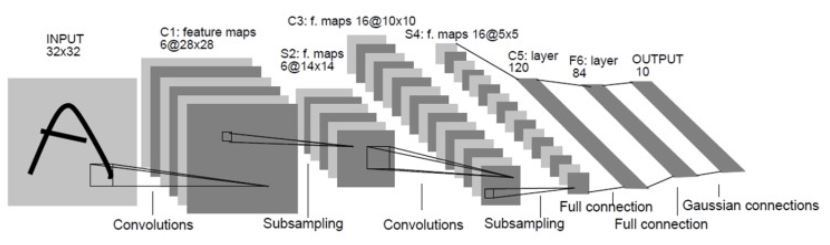

Reference:  https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4

#AlexNet
- Activation function으로 ReLU 사용
- 국소적 정규화 (Local Response Normalization, LRN)실시하는 layer 사용
- Drop out  
    - Over fitting 되는 것을 방지하기 위해 사용

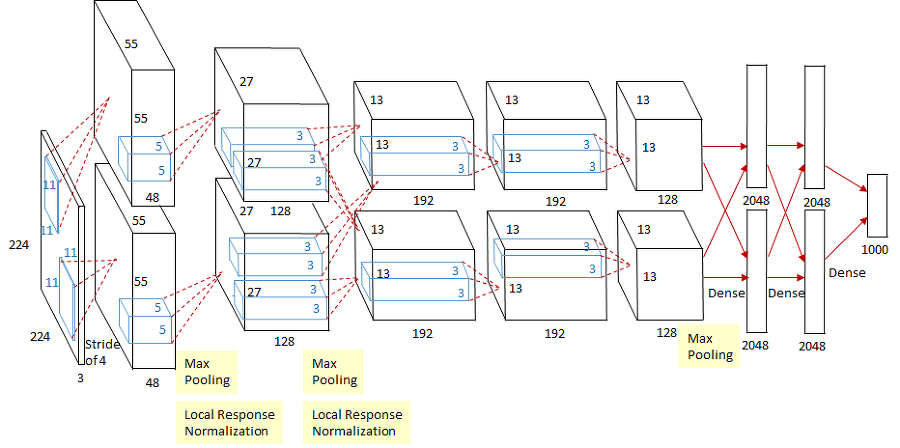

Reference: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf

#VGG-16
- 모든 convolution layer에서의 filter 사이즈를 3x3으로 고정
- 2x2 MaxPooling
- Filter의 개수는 Conv block을 지나면서 2배씩 증가  

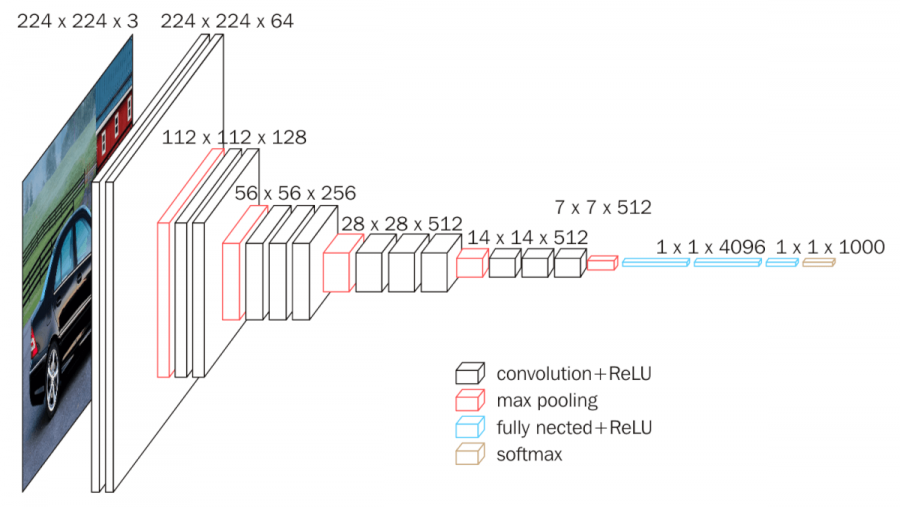

Reference: https://neurohive.io/en/popular-networks/vgg16/

#CNN 학습 구현 - MNIST

Modules import

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Util Classes

In [84]:
# image to column
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

  N, C, H, W = input_data.shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1

  img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
  col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
  
  col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
  return col

# column to image
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
  
  N, C, H, W = input_shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

  img = np.zeros(N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1)

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

  return img[:, :, pad:H + pad, pad:W + pad]

def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * np.sum((pred_y - true_y)**2)

def cross_entropy_error(pred_y, true_y):
  if pred_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis=1)

  batch_size = pred_y.shape[0]
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)
  return cross_entropy_error(pred_y, true_y)


#Util Classes

In [83]:
class ReLU:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[dout.mask] = 0
    dx = dout

    return dx


class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = sigmoid(x)
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out


class Layer:
  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.input_data = None
    self.input_data_shape = None

    self.dW = None
    self.db = None

  def forward(self, input_data):
    self.input_data_shape = input_data.shape
    input_data = input_data.reshape(input_data.shape[0], -1)
    self.input_data = input_data

    # Dot product
    out = np.dot(self.input_data, self.W) + self.b

    return out
  
  def backward(self, dout):
    dx = np.dout(dout, self.W.T)
    self.dW = np.dot(self.input_data.T, dout)
    self.db = np.sum(dout, axis=0)

    dx = dx.reshape(*self.input_data_shape)
    return dx
  

class Softmax:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.input_data[0]
    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size
      
    return dx


In [82]:
class SGD:
  def __init__(self, learning_rate=0.01):
    self.learning_rate = learning_rate

  def updata(self, params, grads):
    for key in params.keys():
      params[key] -= self.learning_rate * grads[key]

In [80]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
num_classes = 10

In [49]:
print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [50]:
x_train, x_test = np.expand_dims(x_train, axis=1), np.expand_dims(x_test, axis=1)

In [51]:
print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [52]:
x_train = x_train[:3000]
x_test = x_test[:500]
t_train = t_train[:3000]
t_test = t_test[:500]

print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

(3000, 1, 28, 28)
(3000,)
(500, 1, 28, 28)
(500,)


In [106]:
class MyModel:
  def __init__(self, input_dim=(1, 28, 28), num_outputs=10):
    conv1_block = {'num_filters':30,
                   'kernel_size':3,
                   'stride':1,
                   'pad':0}

    input_size = input_dim[1]
    conv_output_size = ((input_size - conv1_block['kernel_size'] + 2*conv1_block['pad']) // conv1_block['stride']) + 1
    pool_output_size = int(conv1_block['num_filters'] * (conv_output_size/2) * (conv_output_size/2))

    self.params = {}
    self.params['W1'], self.params['b1'] = self.__init_weights_conv(conv1_block['num_filters'], input_dim[0], 3)
    self.params['W2'], self.params['b2'] = self.__init_weights_fc(pool_output_size, 256)
    self.params['W3'], self.params['b3'] = self.__init_weights_fc(256, 10)

    self.layers = OrderedDict()
    self.layers['Conv1'] = Conv2D(self.params['W1'], self.params['b1'])
    self.layers['ReLU1'] = ReLU()
    self.layers['Pool1'] = Pooling2D(kernel_size=2, stride=2)
    self.layers['Fc1'] = Layer( self.params['W2'], self.params['b2'])
    self.layers['ReLU'] = ReLU()
    self.layers['FC2'] = Layer(self.params['W3'], self.params['b3'])
    self.last_layer = Softmax()

  
  def __init_weights_conv(self, num_filters, data_dim, kernel_size, stride=1, pad=0, weight_std=0.01):
    weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
    biases = np.zeros(num_filters)
    return weights, biases

  def __init_weights_fc(self, num_inputs, num_outputs, weight_std=0.01):
    weights = weight_std * np.random.randn(num_inputs, num_outputs)
    biases = np.zeros(num_outputs)
    return weights, biases

  def forward(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  def loss(self, x, true_y):
    pred_y = self.forward(x)
    return self.last_layer.forward(pred_y, true_y)

  def accuracy(self, x, true_y):
    if true_y.ndim != 1:
      true_y = np.argmax(true_y, axis=1)

    accuracy = 0.0

    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = true_y[i*batch_size:(i+1)*batch_size]
      y = self.forward(tx)
      y = np.argmax(y, axis=1)
      accuracy += np.sum(y == tt)

    return accuracy / x.shape[0]

  def gradient(self, x, true_y):

    self.loss(x, true_y)

    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
    grads['W2'], grads['b2'] = self.layers['FC1'].dW, self.layers['FC1'].db
    grads['W3'], grads['b3'] = self.layers['FC2'].dW, self.layers['FC2'].db

    return grads

#Hyper Parameters

In [2]:
epochs = 10
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.001
current_iter = 0

iter_per_epoch = max(train_size // batch_size, 1)

NameError: ignored

In [91]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

#Model 생성 및 학습

In [1]:
model = MyModel()
model.params.keys()

NameError: ignored

In [104]:
optimizer = SGD(learning_rate)

In [109]:
for epoch in range(epochs):
  for i in range(iter_per_epoch):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = model.gradient(x_batch, t_batch)
    optimizer.update(model.params, grads)

    loss = model.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    x_train_sample, t_train_sample = x_train, t_train
    x_test_sample, t_test_sample = x_test, t_test

    train_accuracy = model.accuracy(x_train_sample, t_train_sample)
    test_accuracy = model.accuracy(x_test_sample, t_test_sample)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

    current_iter += 1

  print("Epoch: {} Train Loss: {:4f}   Train Accuracy: {:4f}   Test Accuracy: {:4f}".format(epoch+1, loss, train_accuracy, test_accuracy))  


ValueError: ignored